In [64]:
#Import Libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import nltk

import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#uploading the required data
data_file = "Reviews Data.csv"
data = pd.read_csv( data_file)

In [4]:
#Exploratory analysis
data_df = pd.DataFrame(data) 
data_df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [5]:
# Total no of Products in the Data
product_name = []
for item in data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

In [6]:
len(product_name)

4410

In [7]:
# Total no of Brands in the Data
data["Brand Name"]
brands = []
for item in data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [8]:
 len(brands) 

385

In [9]:
# Pivot Table for Rating and reviews
info = pd.pivot_table(data_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)
info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     260513        97903  3.962356     1.530069
BLU         239853        58430  3.792262     0.952792
Apple       228346       112280  3.924415     1.998149
LG           86114        23070  3.841460     1.061178
Nokia        64187        25964  3.819291     1.600148
BlackBerry   63126        21114  3.741465     1.279326
Motorola     51157        23107  3.812849     1.777051
HTC          44094        12803  3.465420     1.035506
CNPGD        39176        20151  3.106002     1.638026
OtterBox     35022         2276  4.383778     0.288759

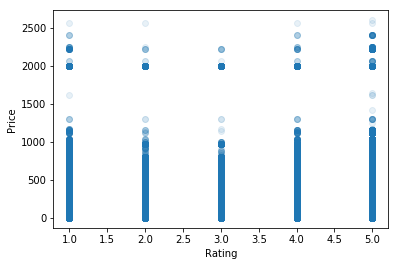

In [12]:
# Correlation between Rating and Price
import matplotlib.pyplot as plt
ylabel = data_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = data_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

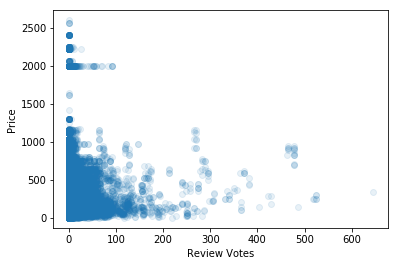

In [11]:
# Correlation between Review Votes and Price
ylabel2 = data_df["Price"]
plt.ylabel("Price")
xlabel2 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()


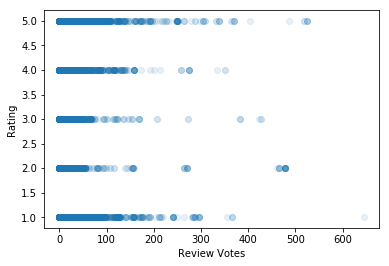

In [13]:
#Correlation between Rating and Review Votes
ylabel3 = data_df["Rating"]
plt.ylabel("Rating")
xlabel3 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [14]:
#Correlation between Rating and Price
corr_matrix = data_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.074767
Review Votes   -0.050303
Name: Rating, dtype: float64

In [15]:
# Correlation between Price and Rating
corr_matrix = data_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.074767
Review Votes    0.021903
Name: Price, dtype: float64

In [16]:
# All reviews added
all_reviews = data_df["Reviews"]
all_reviews.head()

0    I feel so LUCKY to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         Very pleased
3    It works good but it goes slow sometimes but i...
4    Great phone to replace my lost phone. The only...
Name: Reviews, dtype: object

In [17]:
#Data Preprocessing
data_df = shuffle(data_df) 
data_df = data_df.dropna()

In [18]:
# Resetting the index for the Data
data_df = data_df.reset_index(drop=True)

In [19]:
#NLTK sentiment Analyzer
all_reviews = data_df['Reviews']
all_sent_values = []
all_sentiments = []

from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

C:\Users\kingm\Anaconda3\envs\tensorflow\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
# Review specific sentiment values
sample = data_df['Reviews'][1231]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

An Awesome phone ! I purchased this because my daughter has this model and could help me navigate usage of it. Sometime we seniors (age 73)are out in left field with this technology ! Anyway, I ended up learning how to navigate something she did not know about !!!This iPhone is fantastic. The GPS is a favorite, the best navigation ever. I am REALLY enjoying the speak commands feature !! I use it almost exclusively. How spoiled can we get ? ! ? One exception is when some road names have unusual spelling they are undetectable to speech, then you have to text in the address. You can also say, "nearest hospital" or name a restaurant and you are on your way.As for texting, I am not big into that, but a good way to connect with my kids. I do not have time or patients to enter text. I just speak them !!!More features than I will ever need, and features I never thought I would use I am now sold on !!! This phone is a great dollar value to top it all off.
Sentiment: 
1.0


In [21]:
# Collating the sentiment values for all reviews
for i in range(0,20000):
    all_sent_values.append(sentiment_value(all_reviews[i]))

In [ ]:
len(all_sent_values)

In [22]:
# Taking only 20000 rows for the analysis

temp_data = data_df[0:20000]
temp_data.shape

(20000, 6)

In [23]:
# Running the function to bifurcate the ratings from negative to positive
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,20000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [24]:
#Creating new columns for sentiment values and Sentiment's
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT
temp_data.head()

C:\Users\kingm\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kingm\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,Apple iPhone 6s 64GB Unlocked GSM Smartphone -...,Apple,799.99,5,"Phone came perfectly restored, not a single pr...",1.0,5,V.Positive
1,Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...,Samsung,2408.73,5,Love using this phone. Came unlocked as it say...,0.0,5,V.Positive
2,Apple iPhone 4S 32GB (Black) - AT&T,Apple,209.48,4,The phone is good just that when i received it...,4.0,5,V.Positive
3,Samsung Galaxy S5 Mini G800F Unlocked Cellphon...,Samsung,229.00,5,Good stuff thanks guys,0.0,5,V.Positive
4,Blackberry Bold Touch 9930 CDMA GSM Unlocked P...,BlackBerry,104.95,1,"After receiving the phone, inserting the sim c...",3.0,3,Neutral


In [25]:
#find accuracy of Rating based on the Sentiment Values
counter = 0
for i in range(0,20000):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1

In [26]:
counter

4514

In [27]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]
percent_accuracy = accuracy*100
percent_accuracy


77.42999999999999

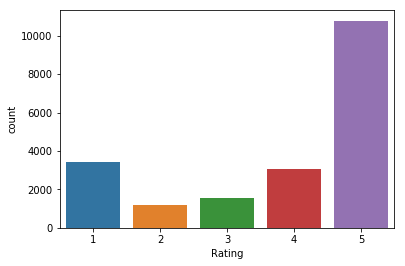

In [63]:
# histogram for concentration of rating
sns.countplot(temp_data['Rating'])

In [29]:
#product names for temp_data
product_name_20k = []
for item in temp_data["Product Name"]:
    if (item in product_name_20k):
        continue
    else:
        product_name_20k.append(item)
len(product_name_20k)

2233

In [66]:
# Total no of Brands in the Data
temp_data["Brand Name"]
brands = []
for item in temp_data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [68]:
len(brands)

215

In [67]:
#Pivot Table with the Sentiment Values for Brand Name
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                                   mean               \
           Rating Review Votes SENTIMENT_VALUE    Rating Review Votes   
Brand Name                                                              
Samsung     15078         5483           15247  3.963722     1.441377   
BLU         13347         2819           13991  3.821071     0.807043   
Apple       13272         6433           13442  3.923145     1.901567   
LG           5192         1531            5308  3.871738     1.141685   
Nokia        3909         1593            4051  3.889552     1.585075   
BlackBerry   3532         1843            3458  3.729673     1.946146   
Motorola     2868         1452            2960  3.854839     1.951613   
HTC          2482          693            2716  3.442441     0.961165   
CNPGD        2403         1015            2854  3.120779     1.318182   
OtterBox     1952          179            1934  4.328160     0.396896   

                            
           SENTIMENT_VALUE  
Brand Name                  
Samsung           4.008149  
BLU               4.005439  
Apple             3.973396  
LG                3.958240  
Nokia             4.030846  
BlackBerry        3.651531  
Motorola          3.978495  
HTC               3.766990  
CNPGD             3.706494  
OtterBox          4.288248

In [31]:
#Pivot Table with the Sentiment Values for Product Name
testing3 = pd.pivot_table(temp_data,index=['Product Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing3 = testing3.sort_values(by=('sum', 'Rating'), ascending = False)
testing3.head(10)

sum               \
                                                   Rating Review Votes   
Product Name                                                             
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...    341           30   
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...    297          287   
BLU Studio 5.0 C HD Unlocked Cellphone, Black         287           81   
BLU Energy X Plus Smartphone - With 4000 mAh Su...    287           27   
BLU Energy X Plus Smartphone - With 4000 mAh Su...    275           50   
Motorola Moto E (1st Generation) - Black - 4 GB...    271          296   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver          269          186   
Apple iPhone 4S 16GB Unlocked GSM - White (Cert...    265          104   
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...    263           34   
Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked ...    259           31   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
Product Name                                                                   
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...             304  4.371795   
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...             314  4.432836   
BLU Studio 5.0 C HD Unlocked Cellphone, Black                  276  4.348485   
BLU Energy X Plus Smartphone - With 4000 mAh Su...             305  3.776316   
BLU Energy X Plus Smartphone - With 4000 mAh Su...             294  3.873239   
Motorola Moto E (1st Generation) - Black - 4 GB...             251  4.593220   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver                   278  3.898551   
Apple iPhone 4S 16GB Unlocked GSM - White (Cert...             259  3.785714   
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...             262  3.652778   
Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked ...             257  4.046875   

                                                                 \
                                                   Review Votes   
Product Name                                                      
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...     0.384615   
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...     4.283582   
BLU Studio 5.0 C HD Unlocked Cellphone, Black          1.227273   
BLU Energy X Plus Smartphone - With 4000 mAh Su...     0.355263   
BLU Energy X Plus Smartphone - With 4000 mAh Su...     0.704225   
Motorola Moto E (1st Generation) - Black - 4 GB...     5.016949   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver           2.695652   
Apple iPhone 4S 16GB Unlocked GSM - White (Cert...     1.485714   
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...     0.472222   
Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked ...     0.484375   

                                                                    
                                                   SENTIMENT_VALUE  
Product Name                                                        
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...        3.897436  
ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE ...        4.686567  
BLU Studio 5.0 C HD Unlocked Cellphone, Black             4.181818  
BLU Energy X Plus Smartphone - With 4000 mAh Su...        4.013158  
BLU Energy X Plus Smartphone - With 4000 mAh Su...        4.140845  
Motorola Moto E (1st Generation) - Black - 4 GB...        4.254237  
Apple iPhone 5s AT&T Cellphone, 16GB, Silver              4.028986  
Apple iPhone 4S 16GB Unlocked GSM - White (Cert...        3.700000  
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...        3.638889  
Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked ...        4.015625

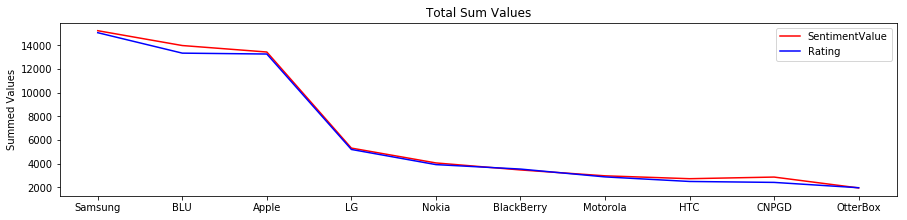

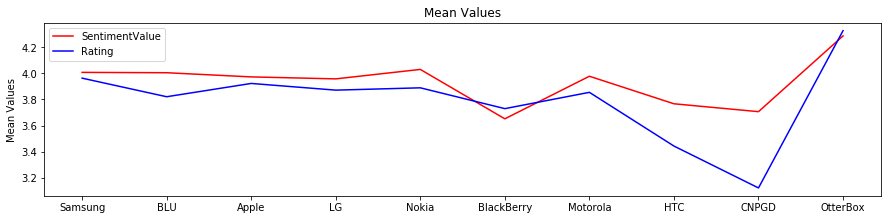

In [32]:
#Plot to display the Total Sum Values and Mean value difference for Rating and Sentiment values
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]
y2 = testing2['sum', 'Rating'][:10]
pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Rating'])
y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]
y2_new = testing2['mean', 'Rating'][:10]
pylab.figure(figsize=(15,7))
pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Rating'])
pylab.show()

In [69]:
#Top 5 Brands
samsung = []
blu = []
apple = []
lg = []
nokia = []

In [34]:
for i in range(0,20000):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'][i]
    if (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [35]:
# plotting the sentiment against top 5 Brands

list_of_brands = [samsung, blu, apple,lg,nokia]
name_of_brands = ['Samsung', 'BLU', 'Apple', 'LG', 'Nokia']

In [36]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,800)
    
    #pylab.xticks(x)
    pylab.ylabel('Sentiment')
    pylab.title(name)
    #pylab.plot(x,brand,"ro", alpha = 0.2)
    pylab.plot(x, brand[:800], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

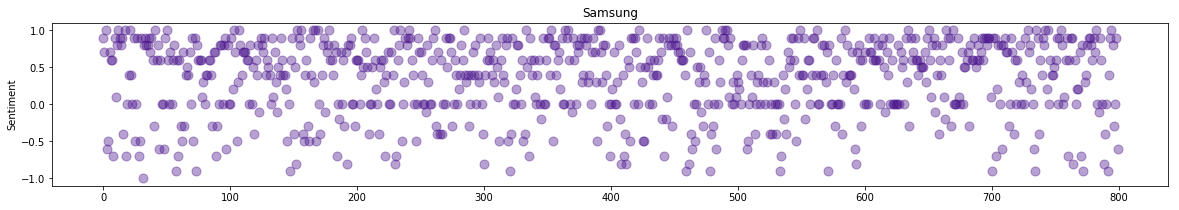

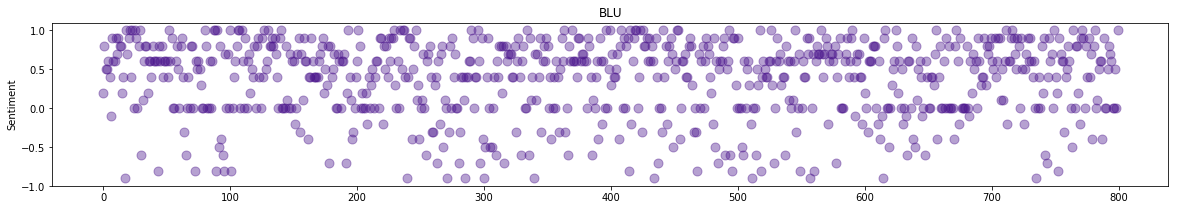

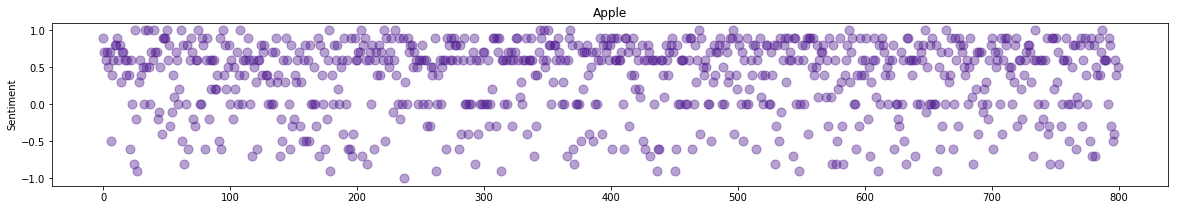

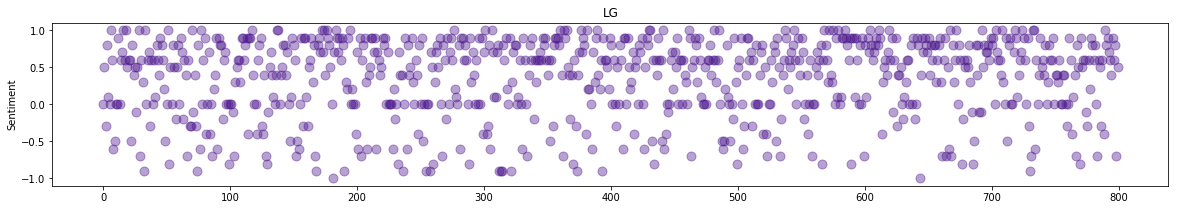

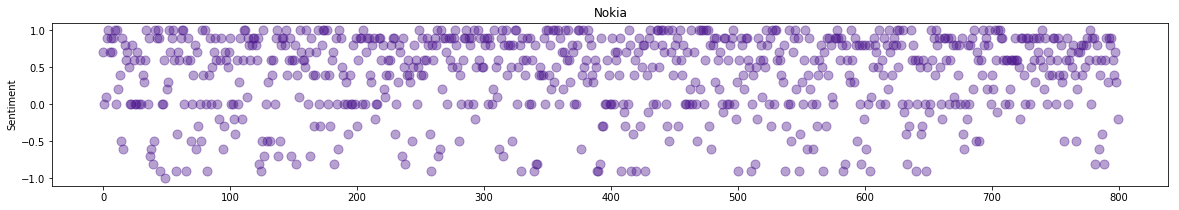

In [37]:
for i in range(0,len(list_of_brands)):
    plot_brand(list_of_brands[i],name_of_brands[i])

In [70]:
# Convert a document to a sequence of words and removing stop words and return the list of words
def review_to_wordlist( review, remove_stopwords=True):
    review_text = BeautifulSoup(review).get_text()
    review_text = re.sub("[^a-zA-Z]"," ", review)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    b=[]
    stemmer = english_stemmer
    for word in words:
        b.append(stemmer.stem(word))
    return(b)

In [65]:
# splitting the data into train and test
train, test = train_test_split(temp_data, test_size = 0.3)

In [42]:
# deriving clean words from the reviews for training and test

clean_train_reviews = []
for review in train['Reviews']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))
    
clean_test_reviews = []
for review in test['Reviews']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))

C:\Users\kingm\Anaconda3\envs\tensorflow\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B00EZHM9JE?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [43]:
#
vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)

In [44]:
#
fselect = SelectKBest(chi2 , k=10000)
train_features = fselect.fit_transform(train_features, train["Rating"])
test_features = fselect.transform(test_features)

In [45]:
# Multinomial Naive Bayes Model
model1 = MultinomialNB(alpha=0.001)
model1.fit( train_features, train["Rating"] )

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [46]:
# Predicting the test data
pred_1 = model1.predict( test_features.toarray() )

In [47]:
pred_1

array([1, 5, 5, ..., 5, 3, 5], dtype=int64)

In [48]:
#Accuracy of the Model
print('prediction 1 accuracy: ', accuracy_score(test['Rating'], pred_1))

prediction 1 accuracy:  0.6731666666666667


In [49]:
#CLassification report for the model
print(classification_report(test['Rating'], pred_1, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.67      0.71      0.69      1010
          2       0.46      0.16      0.23       331
          3       0.45      0.14      0.22       441
          4       0.38      0.20      0.26       931
          5       0.72      0.92      0.81      3287

avg / total       0.63      0.67      0.63      6000



In [71]:
#Confusion Matrix
cnf_matrix = confusion_matrix(test['Rating'],pred_1)

In [72]:
# to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[ 716   31   14   31  218]
 [ 130   52   22   31   96]
 [  93   18   63   63  204]
 [  56    6   26  185  658]
 [  66    5   16  177 3023]]


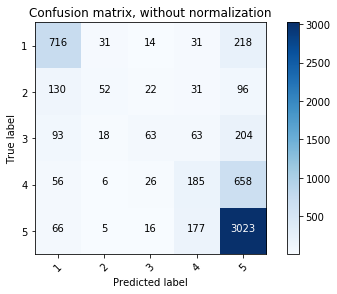

In [56]:
# Confusion Matrix
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],
                      title='Confusion matrix, without normalization')

In [57]:
# Random Forest Classification
model2 = RandomForestClassifier()
model2.fit( train_features, train["Rating"] )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
# Predicting the model
pred_2 = model2.predict( test_features.toarray() )

In [59]:
# Accuracy for the model
print('prediction 2 accuracy: ', accuracy_score(test['Rating'], pred_2))

prediction 2 accuracy:  0.6705


In [60]:
# Classification report
print(classification_report(test['Rating'], pred_2, target_names=['1','2','3','4','5']))


             precision    recall  f1-score   support

          1       0.60      0.71      0.65      1010
          2       0.50      0.15      0.23       331
          3       0.51      0.16      0.24       441
          4       0.43      0.19      0.26       931
          5       0.72      0.92      0.81      3287

avg / total       0.63      0.67      0.62      6000



Confusion matrix, without normalization
[[ 714   17   15   39  225]
 [ 158   49   11   19   94]
 [ 115   10   69   47  200]
 [  80   14   20  175  642]
 [ 118    8   19  126 3016]]


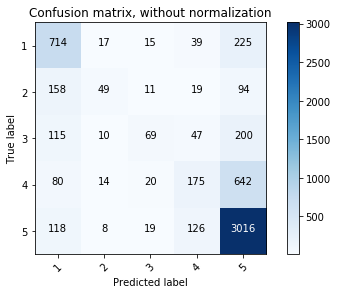

In [61]:
#Confusion matrix
cnf_matrix = confusion_matrix(test['Rating'], pred_2)
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],
                      title='Confusion matrix, without normalization')


In [ ]:
# Conclusion - 